In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.DataFrame({
    'Area':[1000,1250,1500,1750,2000],
    'SalePrice':[200000,250000,175000,225000,300000]
})

In [3]:
data.head()

,Area,SalePrice
0,1000,200000
1,1250,250000
2,1500,175000
3,1750,225000
4,2000,300000


In [4]:
X = data['Area']
y = data['SalePrice']

In [5]:
x_min = X.min()
x_max = X.max()
print(x_min,x_max)

1000 2000


In [6]:
#let's standarize the area field which is our dependent variable
X = (X-x_min)/(x_max-x_min)

In [27]:
X

0    0.00
1    0.25
2    0.50
3    0.75
4    1.00
Name: Area, dtype: float64

In [7]:
y_min = y.min()
y_max = y.max()
print(y_min,y_max)

175000 300000


In [8]:
y = (y-y_min)/(y_max-y_min)

In [9]:
y

0    0.2
1    0.6
2    0.0
3    0.4
4    1.0
Name: SalePrice, dtype: float64

In [10]:
#let's create a function for gradient descent
eta = 0.01 #learning rate
iteration = 2000

In [15]:
#initial parameter
m = 0.45 #slope of the line to start with
b = 0.75 #intercept of first line to start with 

In [16]:
def gred_desc(X,y,m,b,iteration,eta):
    
    past_sse = []
    past_m = []
    past_b = []
    
    for i in range(iteration):
        predicted_saleprice = np.dot(X,m) + b
        error = predicted_saleprice - y
        sse = np.dot(error.T,error)
        past_sse.append(sse)
        past_m.append(m)
        past_b.append(b)
        m = m-eta*2*sum((X*error))
        b = b-eta*2*sum(error)
        
    return past_m,past_b,past_sse    

In [17]:
past_m,past_b,past_sse = gred_desc(X,y,m,b,iteration,eta)

In [18]:
visual_def = pd.DataFrame({'m':past_m,'b':past_b,'sse':past_sse})

In [19]:
visual_def.head()

,m,b,sse
0,0.450000,0.750000,1.834687
1,0.424625,0.696500,1.506380
2,0.402877,0.649619,1.256269
3,0.384288,0.608513,1.065664
4,0.368451,0.572447,0.920341


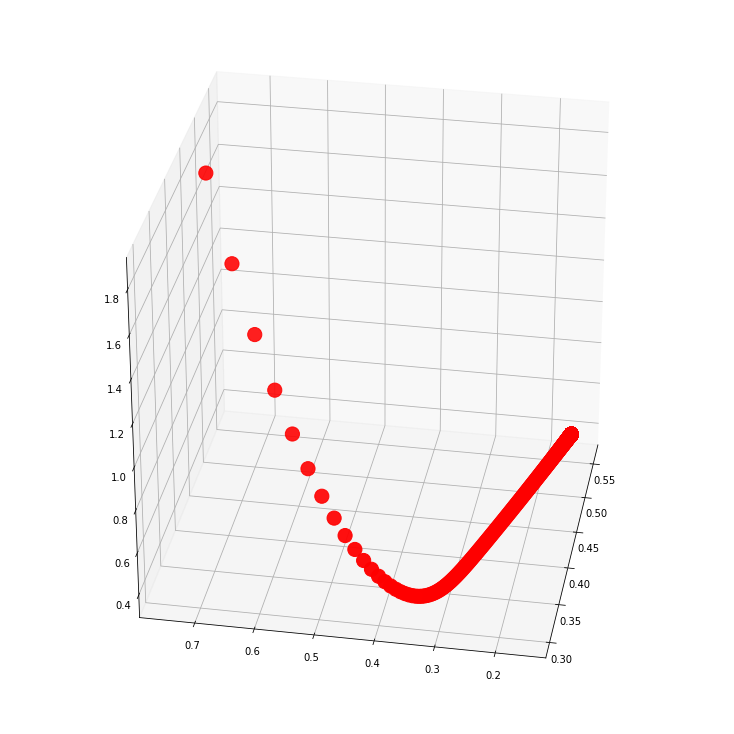

In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
ax.scatter(visual_def['m'],visual_def['b'],visual_def['sse'],c='red',s=200)
ax.view_init(30,190)
plt.show()

In [22]:
visual_def[['sse']].idxmin()

sse    1791
dtype: int64

In [23]:
visual_def.iloc[1999]

m      0.560
b      0.160
sse    0.396
Name: 1999, dtype: float64

In [24]:
predicted_saleprice_standarized = 0.559982 * ((1400-1000)/1000)+0.160010

In [25]:
predicted_saleprice_standarized

0.3840028

In [26]:
final_price = 0.3840028 * 125000 + 175000

In [27]:
final_price

223000.35